In [1]:
!pip install shap

In [2]:
!pip install catboost

In [3]:
!pip install lightgbm

In [4]:
### Load Data 

In [5]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/connect2robiul/CSVfile/master/GGS_new.csv",sep=";")
df.head()

,ID,sex,generations,edu_level,loc,loc_mobil,p_numb,m_numb,ch_numb,relig,relig_type,relig_fre,sg,sge,sgl,generations2,age,a15.1,a15.2,a15.3,a15.4,a15.5,a15.6,a15.7,a15.8,a15.9,a15.10,a15.11,a15.12,a16.1,a16.2,a16.3,a16.4,a16.5,a16.6,a16.7,a16.8,a16.9,a16.10,a16.11,...,a31.9,a31.10,a31.11,a31.12,a32.1,a32.2,a32.3,a32.4,a32.5,a32.6,a32.7,a32.8,a32.9,a32.10,a32.11,a32.12,a33.1,a33.2,a33.3,a33.4,a33.5,a33.6,a33.7,a33.8,a33.9,a33.10,a33.11,a33.12,a34.1,a34.2,a34.3,a34.4,a34.5,a34.6,a34.7,a34.8,a34.9,a34.10,a34.11,a34.12
0,1,2,5,3,2,1,0,1,2,1.0,1.0,4.0,25,235,225,3,41,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,...,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+
1,2,2,5,2,2,1,0,1,2,1.0,1.0,4.0,25,225,225,3,34,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,...,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,NaN,NaN
2,3,2,2,1,2,3,0,1,2,1.0,1.0,4.0,22,212,222,2,69,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,...,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E
3,4,1,5,2,2,1,3,0,1,1.0,1.0,0.0,15,125,125,3,37,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,...,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J
4,5,2,2,2,2,3,0,1,1,1.0,1.0,3.0,22,222,222,2,70,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,...,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5451 entries, 0 to 5450
Columns: 257 entries, ID to a34.12
dtypes: float64(3), int64(14), object(240)
memory usage: 10.7+ MB


In [7]:
df["relig"] = df["relig"]+1
df["relig_type"] = df["relig_type"]+1
df["relig_fre"] = df["relig_fre"]+1

In [8]:
df[["relig","relig_type","relig_fre"]] = df[["relig","relig_type","relig_fre"]].fillna(0)

In [9]:
df = df.fillna("temp")
df.head()

,ID,sex,generations,edu_level,loc,loc_mobil,p_numb,m_numb,ch_numb,relig,relig_type,relig_fre,sg,sge,sgl,generations2,age,a15.1,a15.2,a15.3,a15.4,a15.5,a15.6,a15.7,a15.8,a15.9,a15.10,a15.11,a15.12,a16.1,a16.2,a16.3,a16.4,a16.5,a16.6,a16.7,a16.8,a16.9,a16.10,a16.11,...,a31.9,a31.10,a31.11,a31.12,a32.1,a32.2,a32.3,a32.4,a32.5,a32.6,a32.7,a32.8,a32.9,a32.10,a32.11,a32.12,a33.1,a33.2,a33.3,a33.4,a33.5,a33.6,a33.7,a33.8,a33.9,a33.10,a33.11,a33.12,a34.1,a34.2,a34.3,a34.4,a34.5,a34.6,a34.7,a34.8,a34.9,a34.10,a34.11,a34.12
0,1,2,5,3,2,1,0,1,2,2.0,2.0,5.0,25,235,225,3,41,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,...,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+
1,2,2,5,2,2,1,0,1,2,2.0,2.0,5.0,25,225,225,3,34,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,...,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,temp,temp
2,3,2,2,1,2,3,0,1,2,2.0,2.0,5.0,22,212,222,2,69,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,...,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E
3,4,1,5,2,2,1,3,0,1,2.0,2.0,1.0,15,125,125,3,37,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,...,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J
4,5,2,2,2,2,3,0,1,1,2.0,2.0,4.0,22,222,222,2,70,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,...,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L


In [10]:
corr_matrix = df.corr()
print(corr_matrix["age"].sort_values(ascending=False))

age             1.000000
ch_numb         0.237010
loc_mobil       0.212505
edu_level       0.208184
m_numb          0.196169
sex             0.111252
sge             0.108075
sgl             0.079707
relig           0.050465
relig_type      0.026090
relig_fre       0.010975
loc             0.000017
ID             -0.017212
sg             -0.195015
p_numb         -0.217420
generations2   -0.882170
generations    -0.979239
Name: age, dtype: float64


In [11]:
df = df.drop(["ID","sg","sge","sgl","age","generations2"],axis=1)
df.head()

,sex,generations,edu_level,loc,loc_mobil,p_numb,m_numb,ch_numb,relig,relig_type,relig_fre,a15.1,a15.2,a15.3,a15.4,a15.5,a15.6,a15.7,a15.8,a15.9,a15.10,a15.11,a15.12,a16.1,a16.2,a16.3,a16.4,a16.5,a16.6,a16.7,a16.8,a16.9,a16.10,a16.11,a16.12,a17.1,a17.2,a17.3,a17.4,a17.5,...,a31.9,a31.10,a31.11,a31.12,a32.1,a32.2,a32.3,a32.4,a32.5,a32.6,a32.7,a32.8,a32.9,a32.10,a32.11,a32.12,a33.1,a33.2,a33.3,a33.4,a33.5,a33.6,a33.7,a33.8,a33.9,a33.10,a33.11,a33.12,a34.1,a34.2,a34.3,a34.4,a34.5,a34.6,a34.7,a34.8,a34.9,a34.10,a34.11,a34.12
0,2,5,3,2,1,0,1,2,2.0,2.0,5.0,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC0J,SC0J,SC0J,...,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+
1,2,5,2,2,1,0,1,2,2.0,2.0,5.0,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC0J,SC0J,SC0J,SC0J,SC0J,...,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,temp,temp
2,2,2,1,2,3,0,1,2,2.0,2.0,5.0,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,...,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E
3,1,5,2,2,1,3,0,1,2.0,2.0,1.0,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,...,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J
4,2,2,2,2,3,0,1,1,2.0,2.0,4.0,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,...,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L


In [12]:
object_col = df.select_dtypes(exclude='object').columns.tolist()

In [13]:
df.select_dtypes(include='object')

,a15.1,a15.2,a15.3,a15.4,a15.5,a15.6,a15.7,a15.8,a15.9,a15.10,a15.11,a15.12,a16.1,a16.2,a16.3,a16.4,a16.5,a16.6,a16.7,a16.8,a16.9,a16.10,a16.11,a16.12,a17.1,a17.2,a17.3,a17.4,a17.5,a17.6,a17.7,a17.8,a17.9,a17.10,a17.11,a17.12,a18.1,a18.2,a18.3,a18.4,...,a31.9,a31.10,a31.11,a31.12,a32.1,a32.2,a32.3,a32.4,a32.5,a32.6,a32.7,a32.8,a32.9,a32.10,a32.11,a32.12,a33.1,a33.2,a33.3,a33.4,a33.5,a33.6,a33.7,a33.8,a33.9,a33.10,a33.11,a33.12,a34.1,a34.2,a34.3,a34.4,a34.5,a34.6,a34.7,a34.8,a34.9,a34.10,a34.11,a34.12
0,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC0J,SC0J,SC0J,SC0J,SC0J,SC0J,SC0J,SC0J,SC0J,M1C0J+,M1C0J+,M1C0J+,M1C0J+,M1C0J+,...,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+,M1C1J+
1,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC0J,SC0J,SC0J,SC0J,SC0J,SC0J,SC0J,SC0J,SC0J,SC0J,SC0J,SC0J,SC0J,SC0J,SC0J,SC0J,...,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,temp,temp
2,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,...,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E,M1C1++E
3,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC0E,SC0E,SC0E,SC0E,SC0E,SC0E,SC0E+,SC0E+,SC0E+,...,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J,SC1++J
4,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,...,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L,M1C1++L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5446,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,P1C01,P1C01,P1C01,P1C01,P1C01,P1C01,P1C01,...,temp,temp,temp,temp,temp,temp,temp,temp,temp,temp,temp,temp,temp,temp,temp,temp,temp,temp,temp,temp,temp,temp,temp,temp,temp,temp,temp,temp,temp,temp,temp,temp,temp,temp,temp,temp,temp,temp,temp,temp
5447,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC00,SC0J,SC0J,SC0J,SC0J,SC0J,SC0J,SC0J,SC0J,SC0J,SC0J,SC0J,SC0J,SC0J,SC0J,SC0J,SC0J,SC0J,SC0J,SC0J,SC0J,SC0J,SC0J,SC0J,SC0J,SC0J,SC0J,SC0

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_object_fit = df.select_dtypes(include='object').apply(le.fit_transform)
df_object_fit

,a15.1,a15.2,a15.3,a15.4,a15.5,a15.6,a15.7,a15.8,a15.9,a15.10,a15.11,a15.12,a16.1,a16.2,a16.3,a16.4,a16.5,a16.6,a16.7,a16.8,a16.9,a16.10,a16.11,a16.12,a17.1,a17.2,a17.3,a17.4,a17.5,a17.6,a17.7,a17.8,a17.9,a17.10,a17.11,a17.12,a18.1,a18.2,a18.3,a18.4,...,a31.9,a31.10,a31.11,a31.12,a32.1,a32.2,a32.3,a32.4,a32.5,a32.6,a32.7,a32.8,a32.9,a32.10,a32.11,a32.12,a33.1,a33.2,a33.3,a33.4,a33.5,a33.6,a33.7,a33.8,a33.9,a33.10,a33.11,a33.12,a34.1,a34.2,a34.3,a34.4,a34.5,a34.6,a34.7,a34.8,a34.9,a34.10,a34.11,a34.12
0,3,4,4,4,4,4,4,5,5,6,6,7,8,9,10,10,11,13,13,14,14,14,14,15,16,18,25,27,26,28,30,31,34,34,36,6,6,6,6,6,...,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
1,3,4,4,4,4,4,4,5,5,6,6,7,8,9,10,10,11,13,13,14,14,14,14,15,21,23,25,27,26,28,30,31,34,34,36,36,36,35,35,36,...,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,55,55
2,3,4,4,4,4,4,4,5,5,6,6,7,8,9,10,10,11,13,13,14,14,14,14,15,16,18,20,22,21,23,25,26,29,29,31,31,31,30,30,31,...,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
3,3,4,4,4,4,4,4,5,5,6,6,7,8,9,10,10,11,13,13,14,14,14,14,15,16,18,20,22,21,23,25,29,32,32,34,34,34,34,34,35,...,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47
4,3,4,4,4,4,4,4,5,5,6,6,7,8,9,10,10,11,13,13,14,14,14,14,15,16,18,20,22,21,23,25,26,29,29,31,31,31,30,30,31,...,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5446,3,4,4,4,4,4,4,5,5,6,6,7,8,9,10,10,11,13,13,14,14,14,14,15,16,18,20,22,21,23,25,26,29,17,19,19,19,18,18,19,...,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55
5447,3,4,4,4,4,4,4,5,5,6,6,11,13,14,15,15,16,18,18,19,19,19,19,20,21,23,25,27,26,28,30,31,34,34,36,36,36,35,35,36,...,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27
5448,7,8,8,8,8,9,9,11,11,12,12,13,15,16,17,17,18,20,20,21,21,21,21,22,23,25,27,29,28,30,32,33,36,36,38,38,38,37,37,38,...,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
5449,3,4,4,4,4,4,4,5,5,6,6,7,8,9,10,10,11,13,13,14,14,14,14,15,16,18,27,29,28,30,32,33,36,36,38,39,39,38,38,39,...,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45


In [15]:
from sklearn.preprocessing import LabelEncoder
df_new = df.select_dtypes(include='object').apply(LabelEncoder().fit_transform)
df_new.head()

,a15.1,a15.2,a15.3,a15.4,a15.5,a15.6,a15.7,a15.8,a15.9,a15.10,a15.11,a15.12,a16.1,a16.2,a16.3,a16.4,a16.5,a16.6,a16.7,a16.8,a16.9,a16.10,a16.11,a16.12,a17.1,a17.2,a17.3,a17.4,a17.5,a17.6,a17.7,a17.8,a17.9,a17.10,a17.11,a17.12,a18.1,a18.2,a18.3,a18.4,...,a31.9,a31.10,a31.11,a31.12,a32.1,a32.2,a32.3,a32.4,a32.5,a32.6,a32.7,a32.8,a32.9,a32.10,a32.11,a32.12,a33.1,a33.2,a33.3,a33.4,a33.5,a33.6,a33.7,a33.8,a33.9,a33.10,a33.11,a33.12,a34.1,a34.2,a34.3,a34.4,a34.5,a34.6,a34.7,a34.8,a34.9,a34.10,a34.11,a34.12
0,3,4,4,4,4,4,4,5,5,6,6,7,8,9,10,10,11,13,13,14,14,14,14,15,16,18,25,27,26,28,30,31,34,34,36,6,6,6,6,6,...,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
1,3,4,4,4,4,4,4,5,5,6,6,7,8,9,10,10,11,13,13,14,14,14,14,15,21,23,25,27,26,28,30,31,34,34,36,36,36,35,35,36,...,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,55,55
2,3,4,4,4,4,4,4,5,5,6,6,7,8,9,10,10,11,13,13,14,14,14,14,15,16,18,20,22,21,23,25,26,29,29,31,31,31,30,30,31,...,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
3,3,4,4,4,4,4,4,5,5,6,6,7,8,9,10,10,11,13,13,14,14,14,14,15,16,18,20,22,21,23,25,29,32,32,34,34,34,34,34,35,...,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47
4,3,4,4,4,4,4,4,5,5,6,6,7,8,9,10,10,11,13,13,14,14,14,14,15,16,18,20,22,21,23,25,26,29,29,31,31,31,30,30,31,...,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10


In [16]:
oject_col =df.select_dtypes(include='object').columns.tolist()
for col in oject_col:
    df[col] = df_new[col]
df.head()

,sex,generations,edu_level,loc,loc_mobil,p_numb,m_numb,ch_numb,relig,relig_type,relig_fre,a15.1,a15.2,a15.3,a15.4,a15.5,a15.6,a15.7,a15.8,a15.9,a15.10,a15.11,a15.12,a16.1,a16.2,a16.3,a16.4,a16.5,a16.6,a16.7,a16.8,a16.9,a16.10,a16.11,a16.12,a17.1,a17.2,a17.3,a17.4,a17.5,...,a31.9,a31.10,a31.11,a31.12,a32.1,a32.2,a32.3,a32.4,a32.5,a32.6,a32.7,a32.8,a32.9,a32.10,a32.11,a32.12,a33.1,a33.2,a33.3,a33.4,a33.5,a33.6,a33.7,a33.8,a33.9,a33.10,a33.11,a33.12,a34.1,a34.2,a34.3,a34.4,a34.5,a34.6,a34.7,a34.8,a34.9,a34.10,a34.11,a34.12
0,2,5,3,2,1,0,1,2,2.0,2.0,5.0,3,4,4,4,4,4,4,5,5,6,6,7,8,9,10,10,11,13,13,14,14,14,14,15,16,18,25,27,26,...,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
1,2,5,2,2,1,0,1,2,2.0,2.0,5.0,3,4,4,4,4,4,4,5,5,6,6,7,8,9,10,10,11,13,13,14,14,14,14,15,21,23,25,27,26,...,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,55,55
2,2,2,1,2,3,0,1,2,2.0,2.0,5.0,3,4,4,4,4,4,4,5,5,6,6,7,8,9,10,10,11,13,13,14,14,14,14,15,16,18,20,22,21,...,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
3,1,5,2,2,1,3,0,1,2.0,2.0,1.0,3,4,4,4,4,4,4,5,5,6,6,7,8,9,10,10,11,13,13,14,14,14,14,15,16,18,20,22,21,...,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47
4,2,2,2,2,3,0,1,1,2.0,2.0,4.0,3,4,4,4,4,4,4,5,5,6,6,7,8,9,10,10,11,13,13,14,14,14,14,15,16,18,20,22,21,...,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10


In [17]:
object_col

['sex',
 'generations',
 'edu_level',
 'loc',
 'loc_mobil',
 'p_numb',
 'm_numb',
 'ch_numb',
 'relig',
 'relig_type',
 'relig_fre']

In [24]:
from xgboost import XGBClassifier
from xgboost import plot_importance
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [20]:
def nonbinaryxgboostclassifier(col):
    global df
    df_new = df.copy()
    y = df_new[col]
    X = df_new.drop(col,axis=1)
    data_dmatrix = xgb.DMatrix(data=X,label=y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    params = {
            'objective':'multi:softmax',
            'max_depth': 5,
            'alpha':1,
            'learning_rate': 0.1,
            'n_estimators':1000
        }         

    xgb_clf = XGBClassifier(**params)

    xgb_clf.fit(X_train, y_train)
    y_pred = xgb_clf.predict(X_test)
    plot_importance(xgb_clf,max_num_features=20)
    return accuracy_score(y_test, y_pred), precision_score(y_test, y_pred,average='micro'), recall_score(y_test, y_pred,average='micro'),f1_score(y_test, y_pred,average='macro')

(0.4188817598533456,
 0.4188817598533456,
 0.4188817598533456,
 0.4765880885748721)

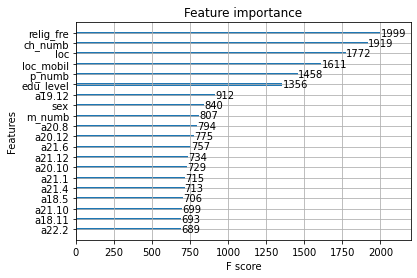

In [25]:
nonbinaryxgboostclassifier('generations')